In [1]:
data[y_col]

NameError: name 'data' is not defined

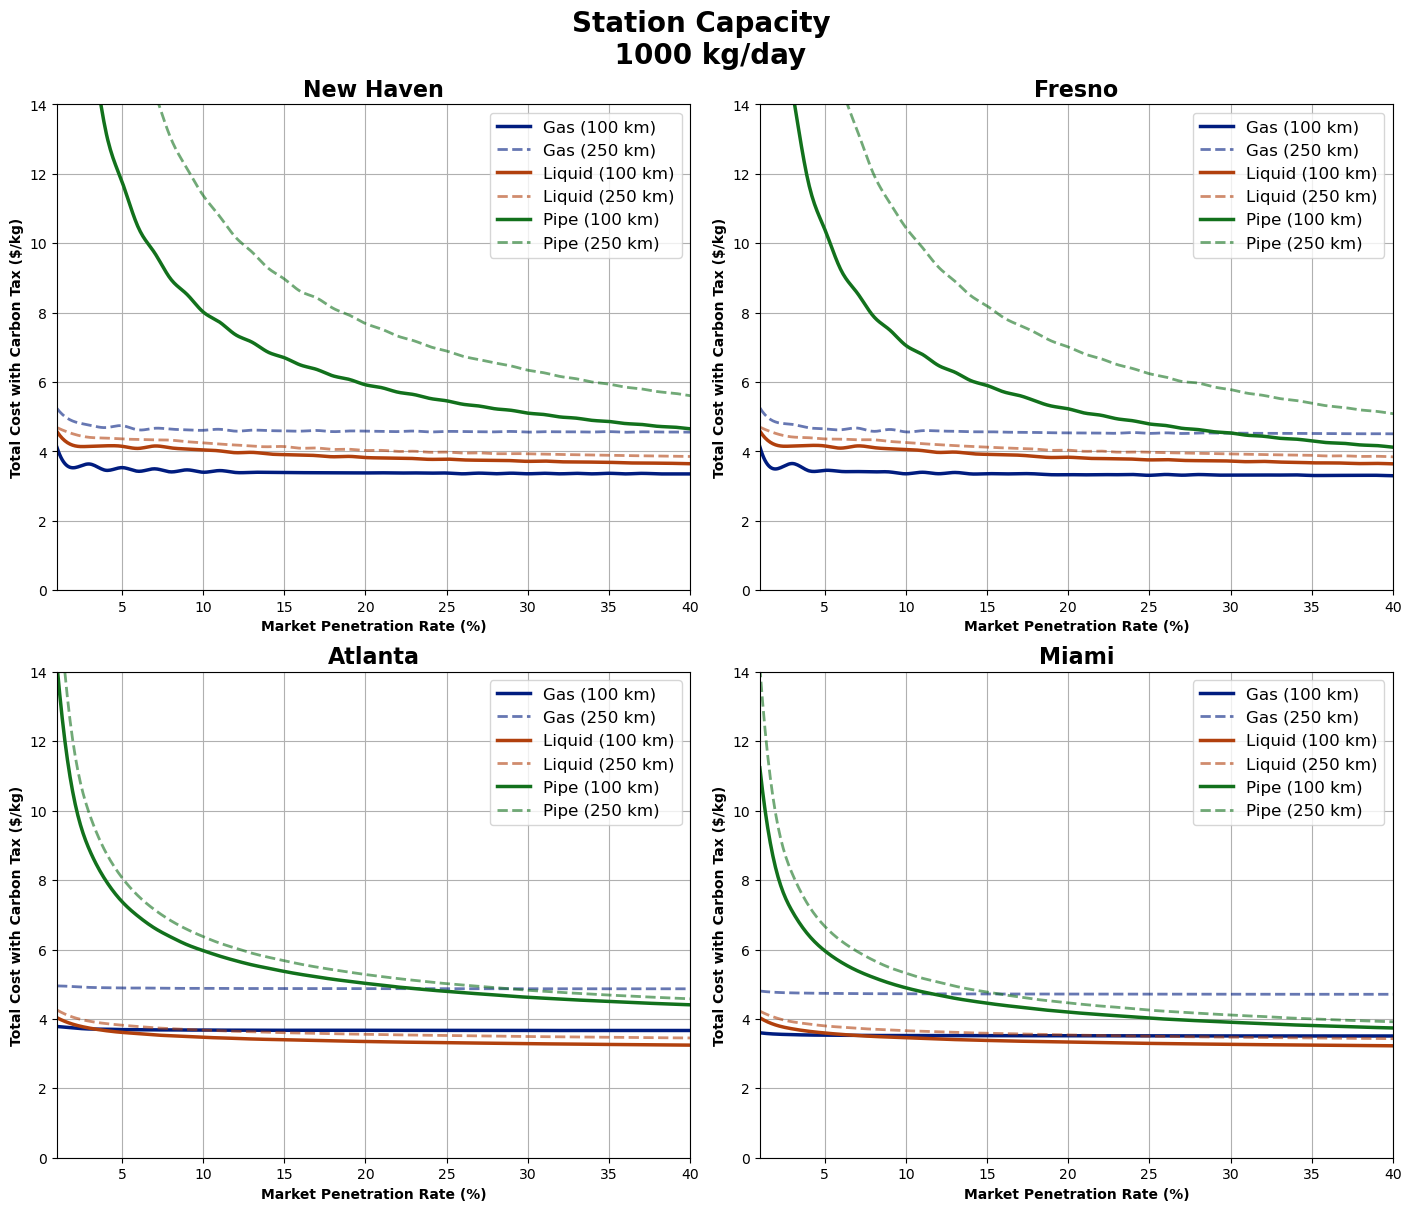

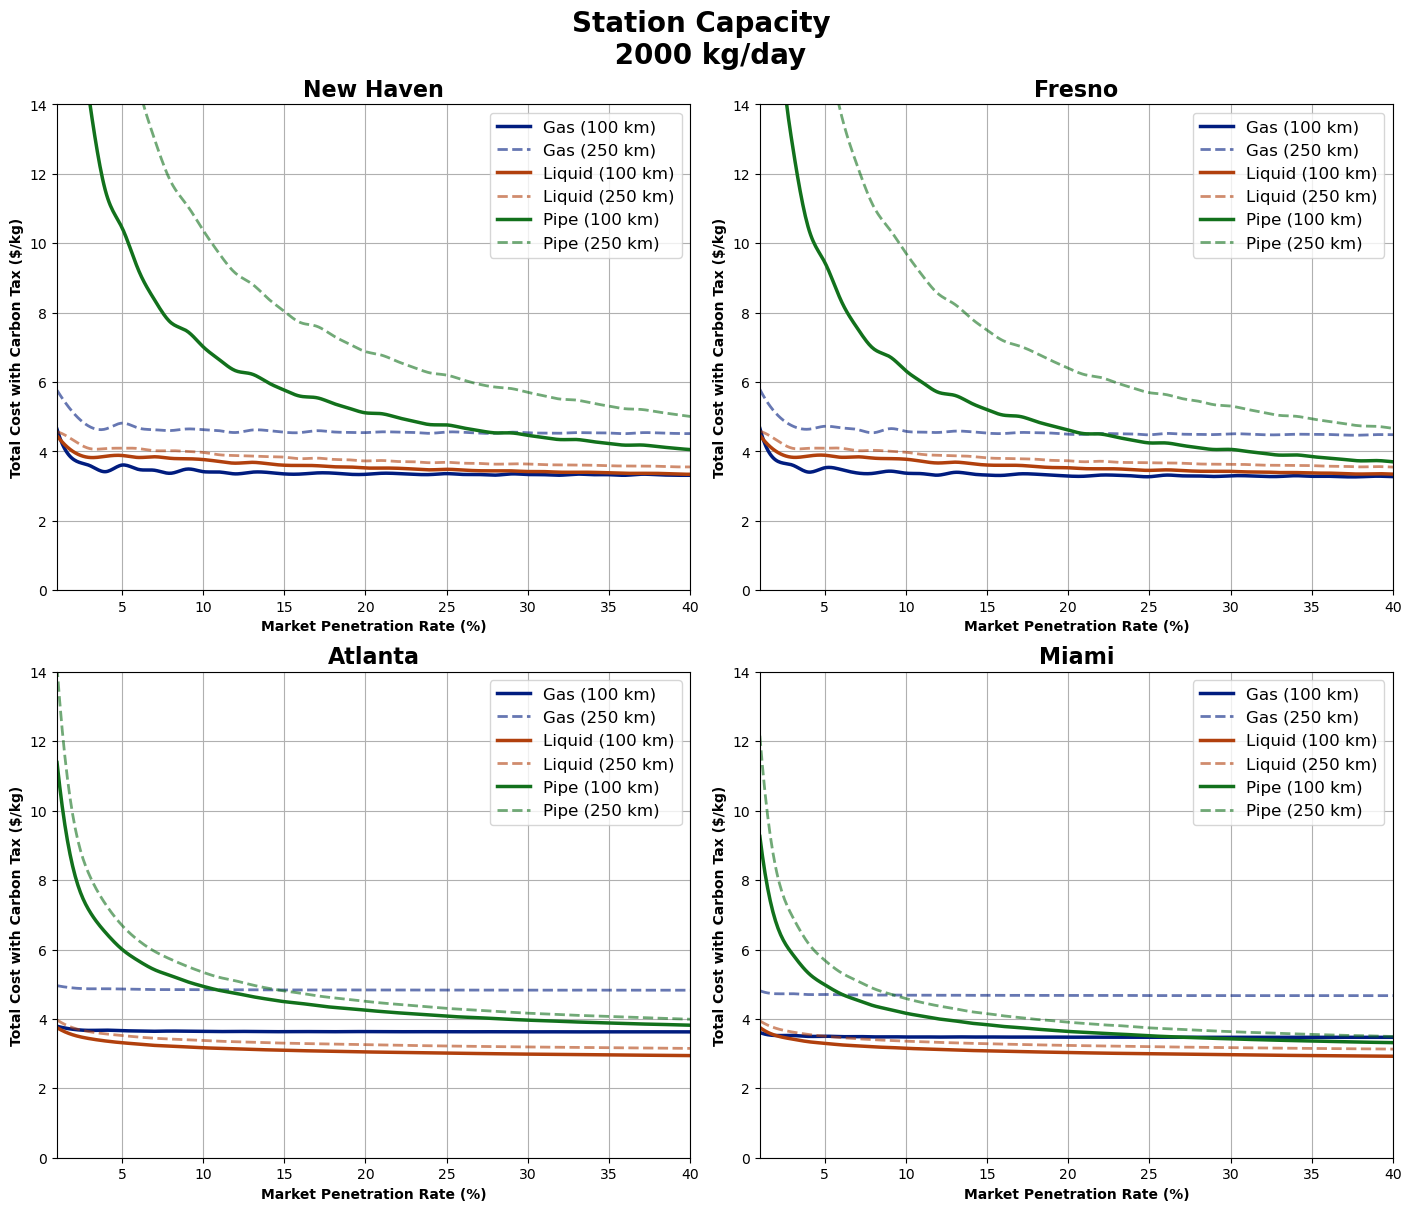

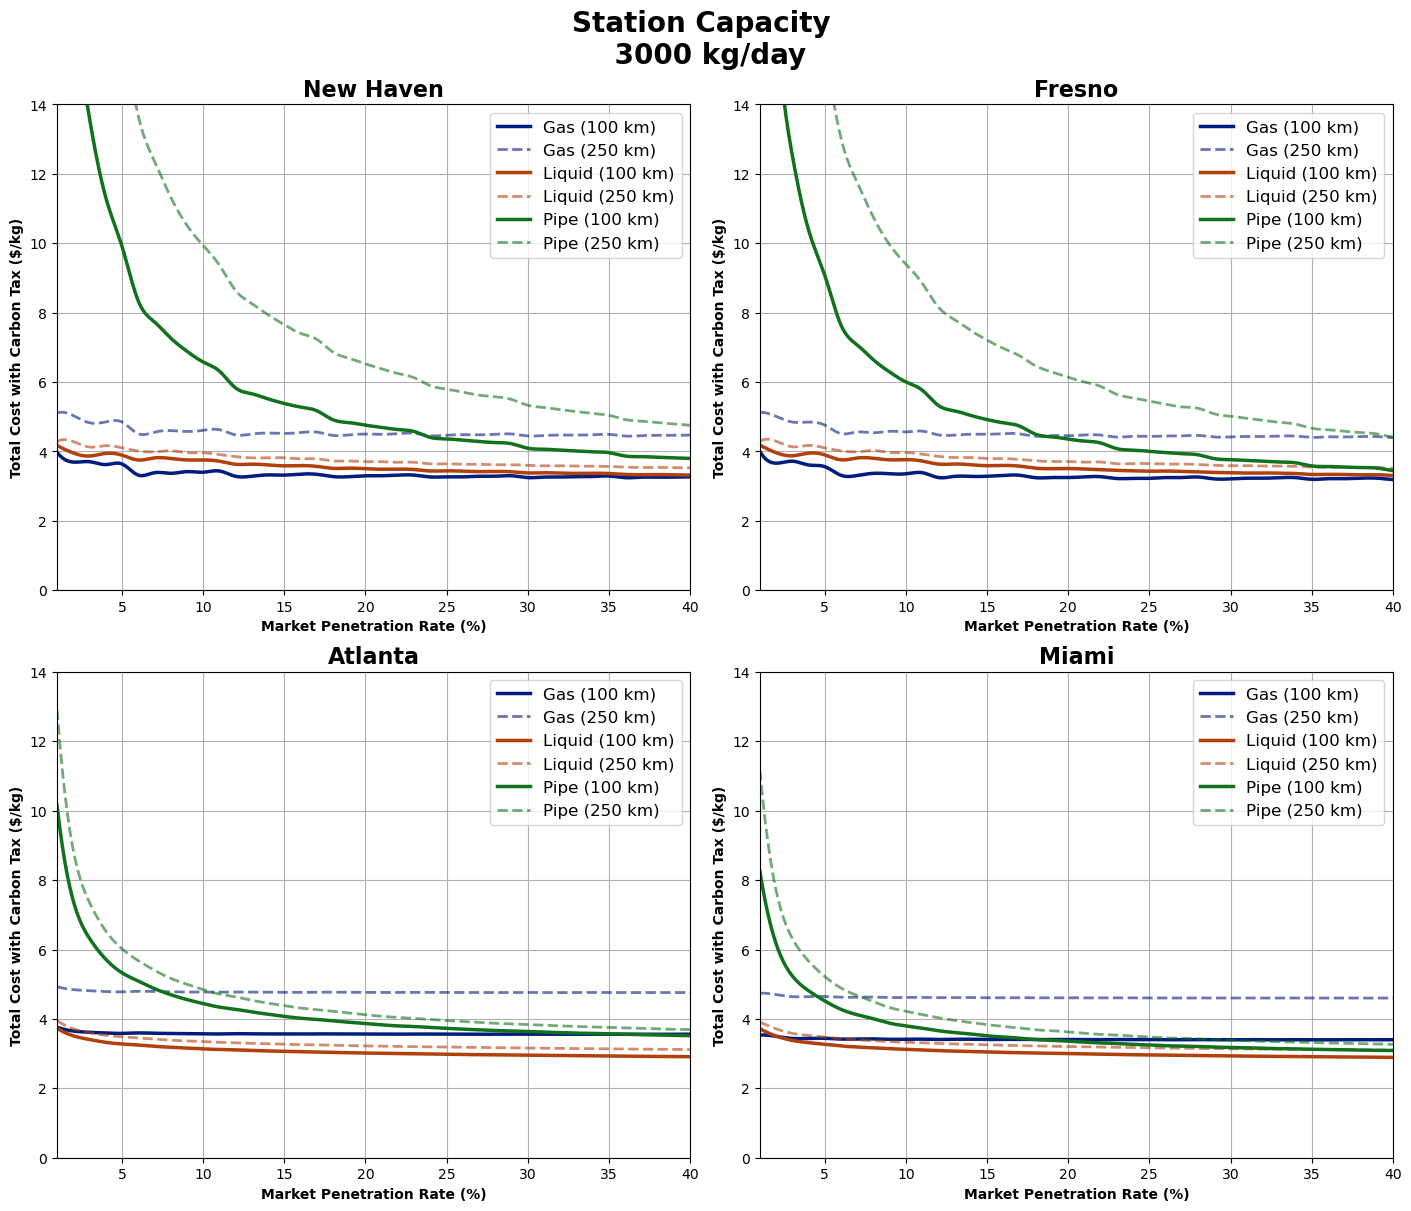

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.interpolate import UnivariateSpline

# Load and combine datasets with distance indicator
file_path_100 = 'Distribution Paper - Market Penetration w_ CC 100 km.csv'
file_path_250 = 'Distribution Paper - Market Penetration w_ CC 250 km.csv'
data_100 = pd.read_csv(file_path_100)
data_250 = pd.read_csv(file_path_250)

# Add Distance Column
data_100['Distance'] = 100
data_250['Distance'] = 250

# Combine into a single DataFrame
data = pd.concat([data_100, data_250], ignore_index=True)

# Clean and convert the Market Penetration Rate to numeric
data['Market Penetration Rate'] = data['Market Penetration Rate'].astype(float)*100#.str.rstrip('%').astype(float)

# Define relevant columns
x_col = 'Market Penetration Rate'
y_col = 'Total Costs'
city_col = 'City Name'
delivery_col = 'Delivery Type'
distance_col = 'Transmission Length'
demand_col = 'Station Size'  # Adjust if necessary

# Use a fully colorblind-safe palette with high contrast
palette = sns.color_palette("dark", n_colors=3)
delivery_colors = {'Gas': palette[0], 'Liquid': palette[1], 'Pipe': palette[2]}


# Get unique city and demand size combinations
cities = data[city_col].unique()
demand_sizes = data[demand_col].unique()

# Clean demand sizes to remove ' kg/day'
cleaned_demand_sizes = [size.split(' ')[0] for size in demand_sizes]  # Extract numeric part

# Loop through each cleaned demand size and create separate figures
for demand_size, clean_demand_size in zip(demand_sizes, cleaned_demand_sizes):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), constrained_layout=True)
    fig.suptitle(f'Station Capacity \n {demand_size}', fontsize=20, fontweight='bold')

    for ax, city in zip(axes.flat, cities):
        # Filter data for the specific city and demand size
        subset_data = data[(data[city_col] == city) & (data[demand_col] == demand_size)]

        # Plot for each delivery type and distance
        for delivery in subset_data[delivery_col].unique():
            for distance in [100, 250]:
                subset = subset_data[(subset_data[delivery_col] == delivery) & (subset_data[distance_col] == distance)]
                subset = subset.sort_values(by=x_col)

                # Group and smooth the data
                subset_grouped = subset.groupby(x_col, as_index=False)[y_col].mean()
                x_vals = subset_grouped[x_col].values
                avg_costs = subset_grouped[y_col].values

                # Interpolate and smooth line
                fine_x = np.linspace(min(x_vals), max(x_vals), 500)
                f_interpolate = interp1d(x_vals, avg_costs, kind='cubic', bounds_error=False, fill_value='extrapolate')
                smooth_y = f_interpolate(fine_x)
                # Apply spline with smoothing factor `s`
                #spline = UnivariateSpline(x_vals, avg_costs, s=5)  # Increase s for more smoothing
                #smooth_y = spline(fine_x)

                # Set linestyle and opacity based on distance
                linestyle = 'solid' if distance == 100 else 'dashed'
                alpha = 1.0 if distance == 100 else 0.6  # Set opacity
                linewidth = 2.5 if distance == 100 else 2  # Slightly thicker for 100 km


                # Plot with solid/dashed lines and different colors for modes
                ax.plot(
                    fine_x, smooth_y,
                    label=f'{delivery} ({distance} km)',
                    color=delivery_colors[delivery],
                    linestyle=linestyle,
                    linewidth=linewidth,
                    alpha=alpha
                )

        # Customize subplot
        city_name_only = city.split(",")[0]  # Extract only the city name before the comma
        ax.set_xlim(1, 40)
        ax.set_ylim(0, 14.001)
        ax.set_title(f'{city_name_only}', fontsize=16, fontweight='bold')
        ax.set_xlabel('Market Penetration Rate (%)', fontsize=10, fontweight='bold')
        ax.set_ylabel('Total Cost with Carbon Tax ($/kg)', fontsize=10, fontweight='bold')
        ax.grid(True)
        ax.legend(fontsize=12, loc='upper right')

    # Save and display the figure for the current demand level
    plt.savefig(f"../Final Plots/2x2_Grid_Demand_{clean_demand_size}.png")
    plt.show()


In [2]:
print(data.columns)


Index(['City Name', 'Delivery Type', 'Station Size', 'Leakage Level',
       'Market Penetration Rate', 'Distribution Leakage',
       'Transmission Leakage', 'Station Leakage Rates', 'Distribution GHG',
       'Transmission GHG', 'Station GHG', 'H2 Deivery (Market Rate)',
       'Total GHG', 'Total Costs', 'Total Cost w/ Carbon Tax'],
      dtype='object')


In [6]:
cities = cities[:3]
demand_sizes = demand_sizes[:3]
demand_sizes

array(['1000 kg/day', '2000 kg/day', '3000 kg/day'], dtype=object)

In [6]:
demand_sizes

array(['1000 kg/day', '2000 kg/day', '3000 kg/day'], dtype=object)

In [3]:
data_100


,City Name,Delivery Type,Station Size,Leakage Level,Market Penetration Rate,Distribution Leakage,Transmission Leakage,Station Leakage Rates,Distribution Cost,Transmission Cost,Station Cost,H2 Deivery (Market Rate),Total Costs,Transmission Length,Distance
0,"New Haven, CT",Gas,1000 kg/day,Medium,1%,0.0018,0.0106,0.0041,0.000000,2.288152,1.823442,1997.58001,4.111594,100,100
1,"New Haven, CT",Gas,1000 kg/day,Medium,3%,0.0018,0.0106,0.0041,0.000000,2.010487,1.628202,5992.74002,3.638689,100,100
2,"New Haven, CT",Gas,1000 kg/day,Medium,5%,0.0018,0.0106,0.0041,0.000000,1.944674,1.589154,9987.90004,3.533828,100,100
3,"New Haven, CT",Gas,1000 kg/day,Medium,7%,0.0018,0.0106,0.0041,0.000000,1.927311,1.572420,13983.06000,3.499731,100,100
4,"New Haven, CT",Gas,1000 kg/day,Medium,9%,0.0018,0.0106,0.0041,0.000000,1.905532,1.563122,17978.22010,3.468654,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,"Miami, FL",Pipe,3000 kg/day,Medium,33%,0.0255,0.0003,0.0041,1.069921,0.251177,1.824556,764465.30100,3.145654,100,100
752,"Miami, FL",Pipe,3000 kg/day,Medium,35%,0.0255,0.0003,0.0041,1.054986,0.247751,1.822938,810796.53100,3.125674,100,100
753,"Miami, FL",Pipe,3000 kg/day,Medium,37%,0.0255,0.0003,0.0041,1.042908,0.243883,1.826086,857127.76100,3.112877,100,100
754,"Miami, FL",Pipe,3000 kg/day,Medium,39%,0.0255,0.0003,0.0041,1.031050,0.240907,1.824556,903458.99200,3.096513,100,100
